In [51]:
import imageio
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [52]:
mt = imageio.imread("MaruTaro.jpg").mean(-1)

In [53]:
shifted = np.fft.fftshift(np.fft.fft2(mt))

In [54]:
x = np.arange(0, shifted.shape[0], 1)
y = np.arange(0, shifted.shape[1], 1)
U, V = np.meshgrid(x, y, indexing="ij")

In [55]:
# ideal_low_pass_filter = ilpf
ilpf = np.zeros(shifted.shape)
P = ilpf.shape[0]
Q = ilpf.shape[1]
D_2 = ((U-P/2) ** 2 + (V-Q/2) ** 2)
ilpf[((U-P/2) ** 2 + (V-Q/2) ** 2) ** 0.5 <= 60] = 1
glpf = np.exp(-D_2 / (2 * 60 ** 2))

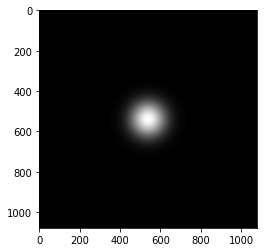

In [56]:
plt.imshow(glpf, cmap="gray")

In [57]:
low_pass_shifted = shifted * ilpf
mt_ifft_filtered = np.fft.ifft2(np.fft.ifftshift(low_pass_shifted))

In [58]:
low_pass_gaussian_shifted = shifted * glpf
mt_ifft_filtered_gauss = np.fft.ifft2(np.fft.ifftshift(low_pass_gaussian_shifted))

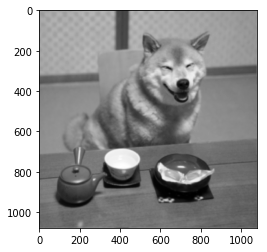

In [71]:
plt.imshow(mt_ifft_filtered_gauss.real, cmap="gray")

In [60]:
mt_ifft_filtered

array([[128.38262672+2.08166817e-15j, 129.85089994+1.21268813e-15j,
        131.21663097+5.04418730e-15j, ..., 124.01086455-9.31325060e-16j,
        125.39633193-5.86111961e-15j, 126.87539606-3.50760246e-15j],
       [134.35843025+3.47054991e-16j, 135.88974001+3.40112963e-15j,
        137.31518328+1.12935913e-14j, ..., 129.783012  +3.30002980e-16j,
        131.23832256-5.37479606e-15j, 132.78541788-4.76833180e-15j],
       [139.98744923+8.08279719e-16j, 141.57624653+3.26695793e-15j,
        143.05492759+8.21202256e-15j, ..., 135.2174354 -6.27534281e-16j,
        136.74102656-5.73789265e-15j, 138.35307171-2.98027443e-16j],
       ...,
       [110.97302087+2.98910704e-15j, 112.2686344 -4.01946727e-16j,
        113.46306016+9.01688387e-15j, ..., 107.10353514-1.72945343e-15j,
        108.32618394-5.23120439e-15j, 109.63722726-1.82777800e-15j],
       [116.43068102-2.92355530e-15j, 117.77655021+1.42546588e-15j,
        119.02244646+1.15045674e-15j, ..., 112.42647007-4.06925333e-15j,
       

<Figure size 1440x720 with 0 Axes>

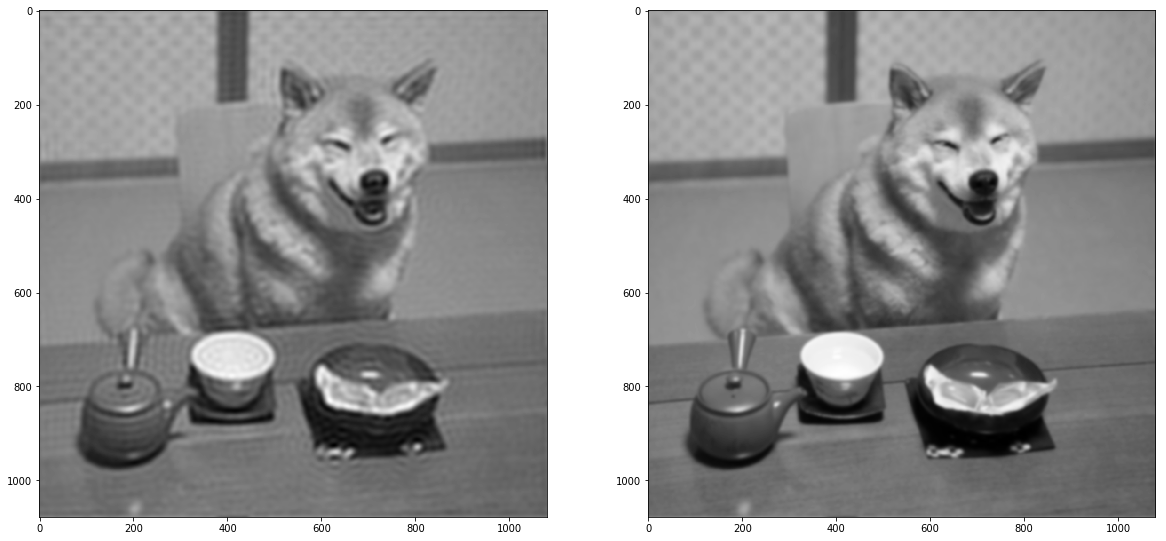

In [68]:
f, axarr = plt.subplots(1,2, figsize=(20,10))
axarr[0].imshow(mt_ifft_filtered.real, cmap="gray")
axarr[1].imshow(mt_ifft_filtered_gauss.real, cmap="gray")

In [74]:
ihpf = 1 - ilpf
ghpf = 1 - glpf

In [75]:
high_pass_shifted = shifted * ihpf
mt_ifft_high = np.fft.ifft2(np.fft.ifftshift(high_pass_shifted))

In [76]:
high_pass_shifted_gauss = shifted * ghpf
mt_ifft_high_gauss = np.fft.ifft2(np.fft.ifftshift(high_pass_shifted_gauss))

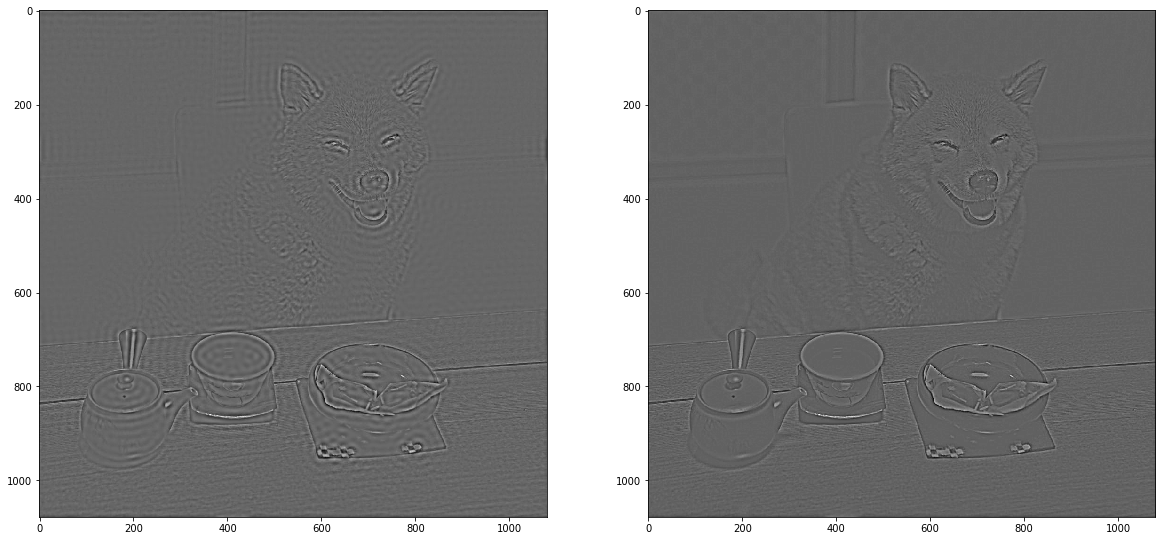

In [77]:
f, axarr = plt.subplots(1,2, figsize=(20,10))
axarr[0].imshow(mt_ifft_high.real, cmap="gray")
axarr[1].imshow(mt_ifft_high_gauss.real, cmap="gray")

# Other tasks
## 3.

In [78]:
def apply_K_times(filt, im, K):
    for i in range(K):
        im = np.fft.fftshift(np.fft.fft2(im))
        filtered = im * filt
        im = np.fft.ifft2(np.fft.ifftshift(filtered)).real
    return im

In [93]:
im = apply_K_times(glpf, mt, 1000)

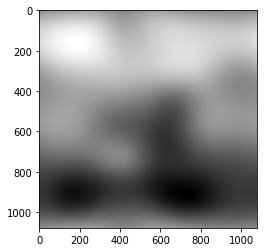

In [95]:
plt.imshow(im, cmap="gray")

In [100]:
print(glpf[glpf > 0.99])


[0.99060001 0.99101285 0.9911505  0.99101285 0.99060001 0.99101285
 0.9919768  0.99266592 0.99307961 0.99321755 0.99307961 0.99266592
 0.9919768  0.99101285 0.99004983 0.99156357 0.9928038  0.99376949
 0.99445985 0.99487429 0.99501248 0.99487429 0.99445985 0.99376949
 0.9928038  0.99156357 0.99004983 0.99156357 0.99307961 0.99432174
 0.99528891 0.99598032 0.9963954  0.9965338  0.9963954  0.99598032
 0.99528891 0.99432174 0.99307961 0.99156357 0.99101285 0.9928038
 0.99432174 0.99556542 0.9965338  0.99722608 0.99764167 0.99778025
 0.99764167 0.99722608 0.9965338  0.99556542 0.99432174 0.9928038
 0.99101285 0.9919768  0.99376949 0.99528891 0.9965338  0.99750312
 0.99819607 0.99861208 0.99875078 0.99861208 0.99819607 0.99750312
 0.9965338  0.99528891 0.99376949 0.9919768  0.99060001 0.99266592
 0.99445985 0.99598032 0.99722608 0.99819607 0.99888951 0.9993058
 0.9994446  0.9993058  0.99888951 0.99819607 0.99722608 0.99598032
 0.99445985 0.99266592 0.99060001 0.99101285 0.99307961 0.9948742